# Data Exploration and Cleaning

In [81]:
import pandas as pd
import numpy as np

In [82]:
def my_print(s):
    '''Custom print function by @kartik2khandelwal :)'''
    a = 4
    for i in s:
        a+=1
    return print('-' * a + '\n' + '| ' + s + ' |' + '\n' + '-' * a)

In [83]:
df= pd.read_csv("Fraud.csv")

In [84]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


*`=> on va utiliser cette commande pour rendre la base plus comprehensible`*

In [85]:
df.rename(columns={
    'step':'Step',
    'type':'Type',
    'amount':'Amount',
    'nameOrig':'sender',
    'oldbalanceOrg': 'sender_old_balance',
    'newbalanceOrig': 'sender_new_balance',
    'nameDest':'client',
    'oldbalanceDest': 'client_old_balance',
    'newbalanceDest': 'client_new_balance',
    'isFraud':'Fraudulent',
    'isFlaggedFraud':'Flagged'
}, inplace= True)
df

,Step,Type,Amount,sender,sender_old_balance,sender_new_balance,client,client_old_balance,client_new_balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [86]:
df.duplicated().sum()

0

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Step                int64  
 1   Type                object 
 2   Amount              float64
 3   sender              object 
 4   sender_old_balance  float64
 5   sender_new_balance  float64
 6   client              object 
 7   client_old_balance  float64
 8   client_new_balance  float64
 9   Fraudulent          int64  
 10  Flagged             int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [88]:
df.describe(include=['object'])


,Type,sender,client
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [89]:
df.isnull().sum()

Step                  0
Type                  0
Amount                0
sender                0
sender_old_balance    0
sender_new_balance    0
client                0
client_old_balance    0
client_new_balance    0
Fraudulent            0
Flagged               0
dtype: int64

In [90]:
df["Fraudulent"]= df["Fraudulent"].apply(str)
fraud_map={"0":"False", "1":"True"}
df["Fraudulent"] = df["Fraudulent"].map(fraud_map)
df["Fraudulent"]

0          False
1          False
2           True
3           True
4          False
           ...  
6362615     True
6362616     True
6362617     True
6362618     True
6362619     True
Name: Fraudulent, Length: 6362620, dtype: object

In [91]:
df["Flagged"]= df["Flagged"].apply(str)
fraud_map={"0":"False", "1":"True"}
df["Flagged"] = df["Flagged"].map(fraud_map)
df["Flagged"]

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: Flagged, Length: 6362620, dtype: object

In [92]:
df

,Step,Type,Amount,sender,sender_old_balance,sender_new_balance,client,client_old_balance,client_new_balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,False,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,True,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,True,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,True,False


*`=> on va supprimer ces colonnes pour optimiser la dataset (eviter toute redondance)`*

In [93]:
df.drop(["sender","client","sender_old_balance","client_old_balance"],axis=1,inplace=True)

In [94]:
df

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,160296.36,0.00,False,False
1,1,PAYMENT,1864.28,19384.72,0.00,False,False
2,1,TRANSFER,181.00,0.00,0.00,True,False
3,1,CASH_OUT,181.00,0.00,0.00,True,False
4,1,PAYMENT,11668.14,29885.86,0.00,False,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.00,0.00,True,False


# EDA

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

*`=>voir la répartition des transactions selon la variable Type `*

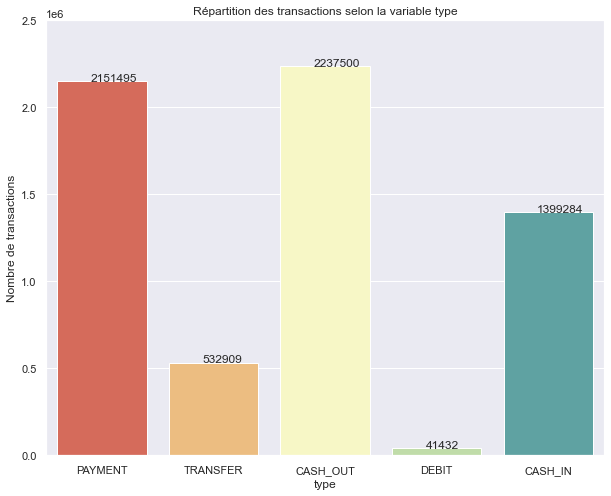

In [96]:
plt.figure(figsize=(10,8))

ax = sns.countplot(x="Type", data=df, palette="Spectral")

plt.title('Répartition des transactions selon la variable type')
plt.xlabel("type")
plt.ylabel("Nombre de transactions")
plt.ylim(0,2500000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))

### Crosstab query

*`=>on va preparer la dataframe cleanFraud pour effectuer la visualisation plus tard`*

In [97]:
data ={
    "Type": ["CASH_IN", "CASH_OUT", "DEBIT", "PAYMENT", "TRANSFER"],
    "Total": 0,
    "Total_Fraud":0,
    "Total_Flagged": 0
}
cleanFraud= pd.DataFrame(data)
totalFraud = pd.crosstab(df.Type,df.Fraudulent)
totalFlagged = pd.crosstab(df.Type,df.Flagged)

print(totalFraud,'\n\n',totalFlagged,'\n\n',cleanFraud)

Fraudulent    False  True
Type                     
CASH_IN     1399284     0
CASH_OUT    2233384  4116
DEBIT         41432     0
PAYMENT     2151495     0
TRANSFER     528812  4097 

 Flagged     False  True
Type                   
CASH_IN   1399284     0
CASH_OUT  2237500     0
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   532893    16 

        Type  Total  Total_Fraud  Total_Flagged
0   CASH_IN      0            0              0
1  CASH_OUT      0            0              0
2     DEBIT      0            0              0
3   PAYMENT      0            0              0
4  TRANSFER      0            0              0


In [98]:
index=0
for x in cleanFraud.Type:
    cleanFraud["Total"][index]= df.loc[df.Type == x,'Type'].count()
    cleanFraud["Total_Fraud"][index]= totalFraud["True"][index]
    cleanFraud["Total_Flagged"][index]= totalFlagged["True"][index]
    index=index+1
cleanFraud

#use libraby to interpret more fraudulent examples

C:\Users\Arfizato\AppData\Local\Temp/ipykernel_8152/2657373515.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arfizato\AppData\Local\Temp/ipykernel_8152/2657373515.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arfizato\AppData\Local\Temp/ipykernel_8152/2657373515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Type,Total,Total_Fraud,Total_Flagged
0,CASH_IN,1399284,0,0
1,CASH_OUT,2237500,4116,0
2,DEBIT,41432,0,0
3,PAYMENT,2151495,0,0
4,TRANSFER,532909,4097,16


Now that we have the dataframe we need to draw the bar plot, we're going back to it

In [99]:
#index=0
## multiplying the values by 10 to make them visible compared to the real
#for x in cleanFraud.Total_Fraud:
    # print(x*100,x)
    #cleanFraud["Total_Fraud"][index]=x*10
    #index=index+1
#cleanFraud

### Horizontal bar Plots

10


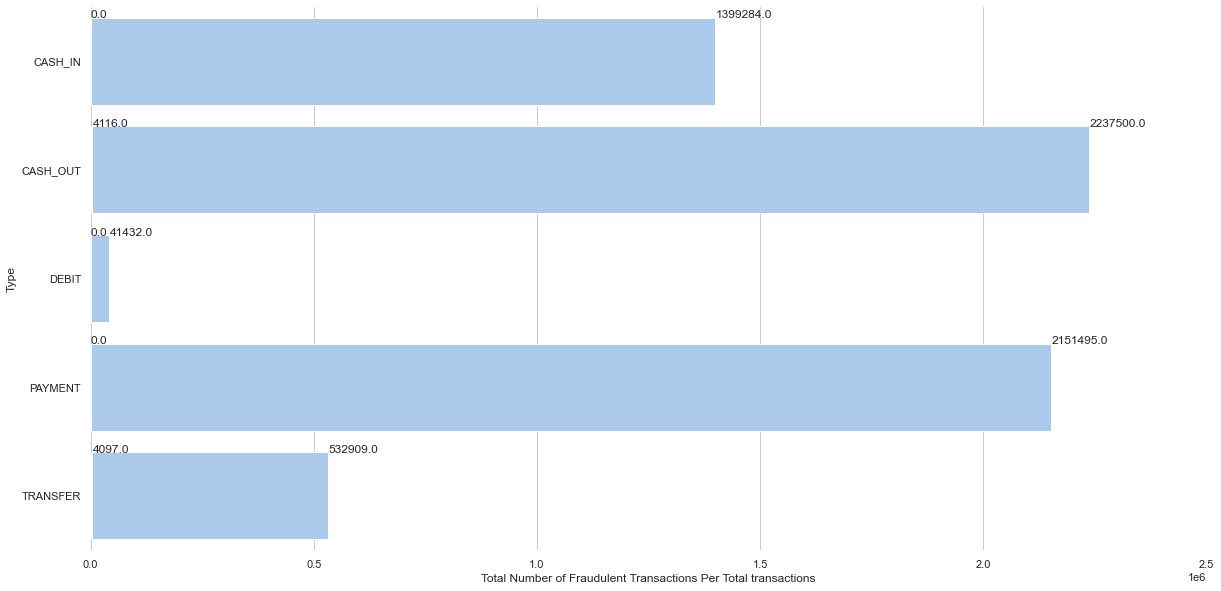

In [100]:
sns.set_theme(style="whitegrid")
#initializing matplotlib figure
f, ax= plt.subplots(figsize=(20,10))
 
#plotting types
sns.set_color_codes("pastel")
sns.barplot(x="Total" ,y="Type",data=cleanFraud,color="b"  )
 
#plotting fraud
sns.set_color_codes("muted")
sns.barplot(x="Total_Fraud", y="Type", data= cleanFraud, color="b" )
 
# more information
ax.set(xlim=(0,2500000), xlabel="Total Number of Fraudulent Transactions Per Total transactions" )
sns.despine(left=True, bottom=True)
 
index=0
print(len(ax.patches))
for p in ax.patches:
    # ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300))
    if index< len(ax.patches)/2:
        ax.annotate((p.get_width()), (p.get_width()+700,p.get_y()))
    else:
        ax.annotate((p.get_width()), (p.get_width(),p.get_y()))
 
        # print(p.get_width(),"\n")
    index+=1

*`=>le nombre de transactions frauduleuses par rapport au nombre total des transactions`*

### Pie Chart

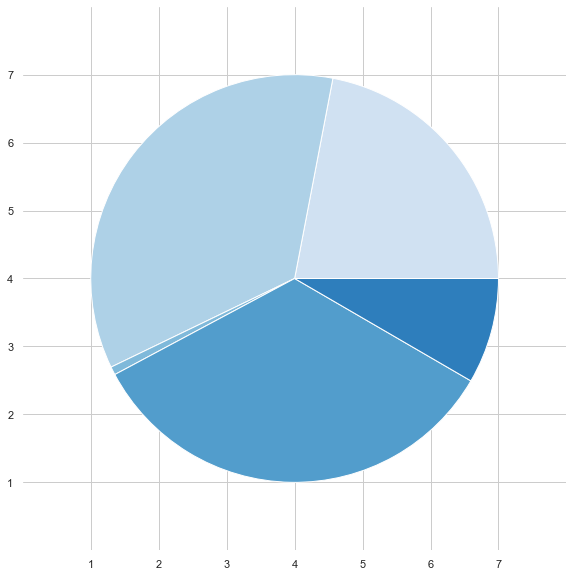

In [101]:
#pie chart
import matplotlib.pyplot as pltt


colors = pltt.get_cmap("Blues")(np.linspace(0.2,0.7,len(cleanFraud.Type)))

#plotting
fig, ax= plt.subplots(figsize=(10,10) )
ax.pie(cleanFraud.Total, colors=colors, radius=3, center=(4,4), wedgeprops={"linewidth":1, "edgecolor":"white"},frame=False )

ax.set(xlim=(0,8),xticks=np.arange(1,8),
       ylim=(0,8),yticks=np.arange(1,8))
plt.show()

In [145]:
import plotly.express as px
fig = px.pie(cleanFraud.Total, values="Total", names="Total")
fig.show()

*`=>le nombre de transactions frauduleuses par rapport au nombre total des transactions`*

### Step LinePlot

In [102]:

tab = pd.crosstab(df.Step,df.Type)
tab.sort_values("Step")

Type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
Step,,,,,
1,527,388,148,1369,276
2,203,104,71,555,81
3,124,52,25,316,35
4,136,77,16,294,42
5,131,61,24,419,30
...,...,...,...,...,...
739,0,5,0,0,5
740,0,3,0,0,3
741,0,11,0,0,11


<AxesSubplot:xlabel='Step'>

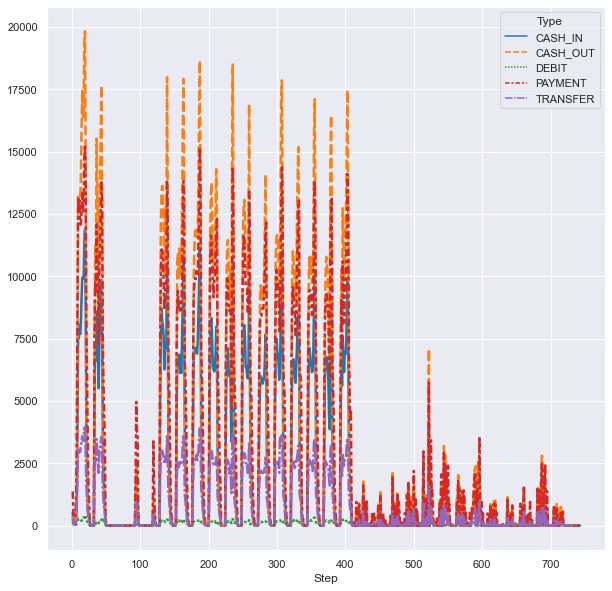

In [146]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(data=tab, palette="tab10", linewidth=2.5)

*`=>on a utilisé ce graphe pour visualiser la simulation`*

## only fraud in df

In [104]:
fraud = df[df['Fraudulent'] == "True"]
fraud

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
2,1,TRANSFER,181.00,0.0,0.00,True,False
3,1,CASH_OUT,181.00,0.0,0.00,True,False
251,1,TRANSFER,2806.00,0.0,0.00,True,False
252,1,CASH_OUT,2806.00,0.0,0.00,True,False
680,1,TRANSFER,20128.00,0.0,0.00,True,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.0,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.0,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.0,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.0,0.00,True,False


C:\Users\Arfizato\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



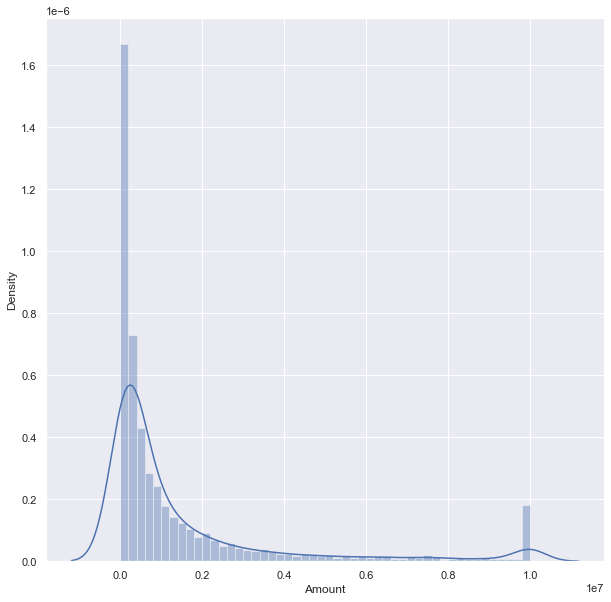

In [105]:

sns.set(rc={'figure.figsize':(10    ,10)})
sns.distplot(fraud['Amount'], x=fraud["Amount"]);


*`=>comme nous pouvons le voir, la fraude ne se produit que lorsque le montant est faible.`*

# Data Training

In [106]:
df

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,160296.36,0.00,False,False
1,1,PAYMENT,1864.28,19384.72,0.00,False,False
2,1,TRANSFER,181.00,0.00,0.00,True,False
3,1,CASH_OUT,181.00,0.00,0.00,True,False
4,1,PAYMENT,11668.14,29885.86,0.00,False,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.00,0.00,True,False


### Cleaning


*`=>Echantillon`*

In [107]:
from sklearn.preprocessing import LabelEncoder

tdf= df.sample(frac=0.01)

labEnc= LabelEncoder()
tdf["Type"]=labEnc.fit_transform(tdf["Type"])
#onehutencoder
tdf

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
4969834,351,1,202246.87,0.00,4199454.05,False,False
3220689,250,1,24978.08,0.00,167598.59,False,False
2091768,182,1,22383.76,0.00,310669.81,False,False
1579957,155,1,171254.05,0.00,1942710.73,False,False
63304,9,0,282267.06,290124.06,305034.09,False,False
...,...,...,...,...,...,...,...
4066755,300,1,5647.37,0.00,497419.42,False,False
3569165,260,3,542.03,0.00,0.00,False,False
208677,13,3,8243.17,0.00,0.00,False,False
3554974,260,0,74287.71,8707182.99,10384523.47,False,False


In [108]:
tdf["Fraudulent"]=labEnc.fit_transform(tdf["Fraudulent"])
tdf["Flagged"]=labEnc.fit_transform(tdf["Flagged"])
tdf

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
4969834,351,1,202246.87,0.00,4199454.05,0,0
3220689,250,1,24978.08,0.00,167598.59,0,0
2091768,182,1,22383.76,0.00,310669.81,0,0
1579957,155,1,171254.05,0.00,1942710.73,0,0
63304,9,0,282267.06,290124.06,305034.09,0,0
...,...,...,...,...,...,...,...
4066755,300,1,5647.37,0.00,497419.42,0,0
3569165,260,3,542.03,0.00,0.00,0,0
208677,13,3,8243.17,0.00,0.00,0,0
3554974,260,0,74287.71,8707182.99,10384523.47,0,0


In [109]:
x = tdf.drop(["Step","Fraudulent","Flagged"], axis=1) #,"sender_new_balance","client_new_balance"
x

,Type,Amount,sender_new_balance,client_new_balance
4969834,1,202246.87,0.00,4199454.05
3220689,1,24978.08,0.00,167598.59
2091768,1,22383.76,0.00,310669.81
1579957,1,171254.05,0.00,1942710.73
63304,0,282267.06,290124.06,305034.09
...,...,...,...,...
4066755,1,5647.37,0.00,497419.42
3569165,3,542.03,0.00,0.00
208677,3,8243.17,0.00,0.00
3554974,0,74287.71,8707182.99,10384523.47


In [110]:
y= tdf["Fraudulent"]
y

4969834    0
3220689    0
2091768    0
1579957    0
63304      0
          ..
4066755    0
3569165    0
208677     0
3554974    0
1952410    0
Name: Fraudulent, Length: 63626, dtype: int32

*`=>On va prendre 0.2 des données qu'on va mettre dans testX et testY, et le reste des 0.8, on va les mettres dans trainX et trainY`*

## Model 1
### Training

In [111]:
from sklearn.model_selection import train_test_split

trainX,testX, trainY,  testY= train_test_split(x,y, test_size=0.2)# , random_state=42, shuffle=True)
#try using epochs  , check tensorflow documentation // freecodecamp course uses tensorflow , epochs
trainX

,Type,Amount,sender_new_balance,client_new_balance
1296059,1,159497.52,0.00,555286.54
1202299,3,17941.57,0.00,0.00
211824,1,102671.31,0.00,1046839.87
151477,0,224785.01,226373.01,0.00
3729988,1,97377.33,0.00,6385732.96
...,...,...,...,...
4414771,3,29172.08,0.00,0.00
1820161,0,77764.55,18278287.97,739603.23
3242995,1,55990.10,117080.90,130333.42
2966461,3,18491.19,34072.81,0.00


In [112]:
testX

,Type,Amount,sender_new_balance,client_new_balance
6120800,0,296802.61,391150.61,0.00
6220671,3,1805.08,0.00,0.00
2856077,3,20526.80,2038.20,0.00
4994000,3,6509.62,0.00,0.00
2336381,3,481.22,51591.78,0.00
...,...,...,...,...
781106,4,149088.60,0.00,486440.40
6059190,0,50935.61,68578.61,246116.55
2371265,3,2046.16,7984.84,0.00
4998194,2,4122.80,52007.20,6486269.74


In [113]:
print("TrainX:\n",trainX,"\n---------------------------------------------------------------------------------\nTestX:\n",testX)

TrainX:
          Type     Amount  sender_new_balance  client_new_balance
1296059     1  159497.52                0.00           555286.54
1202299     3   17941.57                0.00                0.00
211824      1  102671.31                0.00          1046839.87
151477      0  224785.01           226373.01                0.00
3729988     1   97377.33                0.00          6385732.96
...       ...        ...                 ...                 ...
4414771     3   29172.08                0.00                0.00
1820161     0   77764.55         18278287.97           739603.23
3242995     1   55990.10           117080.90           130333.42
2966461     3   18491.19            34072.81                0.00
4378671     0   57710.14          7193935.34            26094.56

[50900 rows x 4 columns] 
---------------------------------------------------------------------------------
TestX:
          Type     Amount  sender_new_balance  client_new_balance
6120800     0  296802.61     

### Modeling

In [114]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(trainX,trainY)

KNeighborsRegressor()

### Prediction

In [115]:
prediction = model.predict(testX)

In [116]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [117]:
from sklearn.metrics import r2_score

r2_score(testY,prediction)

0.004159546849185736

In [118]:
print(tdf.shape,trainX.shape,trainY.shape,testX.shape,testY.shape)

(63626, 7) (50900, 4) (50900,) (12726, 4) (12726,)


## Model 2

In [119]:
tdf

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
4969834,351,1,202246.87,0.00,4199454.05,0,0
3220689,250,1,24978.08,0.00,167598.59,0,0
2091768,182,1,22383.76,0.00,310669.81,0,0
1579957,155,1,171254.05,0.00,1942710.73,0,0
63304,9,0,282267.06,290124.06,305034.09,0,0
...,...,...,...,...,...,...,...
4066755,300,1,5647.37,0.00,497419.42,0,0
3569165,260,3,542.03,0.00,0.00,0,0
208677,13,3,8243.17,0.00,0.00,0,0
3554974,260,0,74287.71,8707182.99,10384523.47,0,0


### Training

In [120]:

print(x.shape, y.shape)
X, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

(63626, 4) (63626,)


In [121]:
print("x:",X.shape,X_test.shape,"\ny:",y.shape,y_test.shape)

x: (50900, 4) (12726, 4) 
y: (50900,) (12726,)


In [122]:
X

,Type,Amount,sender_new_balance,client_new_balance
132617,3,4140.71,91001.29,0.00
5967018,4,338630.65,0.00,4871741.79
5390000,1,221435.38,0.00,2149863.35
4681293,3,4954.09,0.00,0.00
4577490,3,44417.91,63412.09,0.00
...,...,...,...,...
1477409,0,56902.69,14806532.38,891085.61
1567612,3,18502.31,0.00,0.00
3704948,4,336490.14,0.00,2236805.40
1888022,1,70852.23,0.00,366094.23


In [123]:
y

132617     0
5967018    0
5390000    0
4681293    0
4577490    0
          ..
1477409    0
1567612    0
3704948    0
1888022    0
3498605    0
Name: Fraudulent, Length: 50900, dtype: int32

### Modeling

In [125]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

N_SPLITS = 2

lgbm_preds = []
xgb_preds = []
catb_preds = []

prob = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(tqdm(folds.split(X, y), total=N_SPLITS)):

    my_print(f'fold {fold + 1}')

    X_train, y_train = X.iloc[train_id], y.iloc[train_id]
    X_valid, y_valid = X.iloc[test_id], y.iloc[test_id]

    lgbm_model = lgbm.LGBMClassifier()
    xgb_model  = xgb.XGBClassifier()
    catb_model = catb.CatBoostClassifier(verbose=0)

    lgbm_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    catb_model.fit(X_train, y_train)

    my_print(f'Training Accuracy   :- {(lgbm_model.score(X_train, y_train)*100).round(2)}% | {(xgb_model.score(X_train, y_train)*100).round(2)}% | {(catb_model.score(X_train, y_train)*100).round(2)}%')
    my_print(f'Validation Accuracy :- {(lgbm_model.score(X_valid, y_valid)*100).round(2)}% | {(xgb_model.score(X_valid, y_valid)*100).round(2)}% | {(catb_model.score(X_valid, y_valid)*100).round(2)}%')

    prob1, prob2, prob3 = lgbm_model.predict_proba(X_test), xgb_model.predict_proba(X_test), catb_model.predict_proba(X_test)
    prob.append((prob1 + prob2 + prob3) / 3)
my_print('Model Trained !!!')

  0%|          | 0/2 [00:00<?, ?it/s]

----------
| fold 1 |
----------


C:\Users\Arfizato\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:59:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 50%|█████     | 1/2 [00:11<00:11, 11.56s/it]

---------------------------------------------------
| Training Accuracy   :- 99.61% | 100.0% | 99.98% |
---------------------------------------------------
---------------------------------------------------
| Validation Accuracy :- 99.52% | 99.92% | 99.93% |
---------------------------------------------------
----------
| fold 2 |
----------


C:\Users\Arfizato\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:59:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 2/2 [00:22<00:00, 11.21s/it]

---------------------------------------------------
| Training Accuracy   :- 99.68% | 99.98% | 99.99% |
---------------------------------------------------
--------------------------------------------------
| Validation Accuracy :- 99.61% | 99.9% | 99.91% |
--------------------------------------------------
---------------------
| Model Trained !!! |
---------------------


### Prediction

In [127]:
final = [[0,0]]
for i in range(N_SPLITS):
    final = final + prob[i]

final = final/N_SPLITS
y_pred = pd.Series([np.argmax([i]) for i in final])

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Test Accuracy:- {accuracy_score(y_test, y_pred)*100}%')

Test Accuracy:- 99.91356278484992%


In [129]:
# sns.heatmap(confusion_matrix(y_test, y_pred), cmap='cool_r', linewidths=0.5, annot=True);

# visualizing total fraudulent transactions in comparison to total transactions

In [138]:
import plotly.graph_objects as go
ff = go.FigureWidget( )
ff.add_bar(x=cleanFraud.Type, y=cleanFraud.Total)

FigureWidget({
    'data': [{'type': 'bar',
              'uid': '0ec508b9-a224-4832-a3d2-52f6c25d2360',
     …

In [139]:
ff.add_scatter(x=cleanFraud.Type, y=cleanFraud.Total)

FigureWidget({
    'data': [{'type': 'bar',
              'uid': '0ec508b9-a224-4832-a3d2-52f6c25d2360',
     …

In [132]:
df

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
0,1,PAYMENT,9839.64,160296.36,0.00,False,False
1,1,PAYMENT,1864.28,19384.72,0.00,False,False
2,1,TRANSFER,181.00,0.00,0.00,True,False
3,1,CASH_OUT,181.00,0.00,0.00,True,False
4,1,PAYMENT,11668.14,29885.86,0.00,False,False
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,True,False
6362616,743,TRANSFER,6311409.28,0.00,0.00,True,False
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,True,False
6362618,743,TRANSFER,850002.52,0.00,0.00,True,False


In [133]:
cleanFraud

,Type,Total,Total_Fraud,Total_Flagged
0,CASH_IN,1399284,0,0
1,CASH_OUT,2237500,4116,0
2,DEBIT,41432,0,0
3,PAYMENT,2151495,0,0
4,TRANSFER,532909,4097,16


In [134]:
tdf

,Step,Type,Amount,sender_new_balance,client_new_balance,Fraudulent,Flagged
4969834,351,1,202246.87,0.00,4199454.05,0,0
3220689,250,1,24978.08,0.00,167598.59,0,0
2091768,182,1,22383.76,0.00,310669.81,0,0
1579957,155,1,171254.05,0.00,1942710.73,0,0
63304,9,0,282267.06,290124.06,305034.09,0,0
...,...,...,...,...,...,...,...
4066755,300,1,5647.37,0.00,497419.42,0,0
3569165,260,3,542.03,0.00,0.00,0,0
208677,13,3,8243.17,0.00,0.00,0,0
3554974,260,0,74287.71,8707182.99,10384523.47,0,0


## Sunburst

In [135]:
import plotly.express as px
#https://plotly.com/python/sunburst-charts/
fig= px.sunburst(df.sample(frac=0.1) , path=["Type","Fraudulent"], values="Amount")
fig.show()

## Treemap

In [136]:
fig= px.treemap(df.sample(frac=0.01), path=[px.Constant("Graph"),"Type","Fraudulent"], values="Amount")
fig.show()
#https://plotly.com/python/treemaps/

## Logarithmic line+markers

In [142]:
fig=go.Figure()

fig.add_trace(go.Scatter( 
    x=cleanFraud.Type, y=cleanFraud.Total, mode="lines+markers", name="Total"
))
fig.add_trace(go.Scatter(
    x=cleanFraud.Type, y=cleanFraud.Total_Fraud, mode="lines+markers", name="Total Fraud"
))
fig.update_yaxes(type="log")
fig.update_layout(title_text="Total Fraudulent transactions in Comparison To Total Transactions")

fig.show()
#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html